In [ ]:
# /content/drive/MyDrive/Colab Notebooks/Видео/NEW_origcam1/origcam1_frame_1.png
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.image as mpimg
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
input_folder = '/content/drive/MyDrive/Colab Notebooks/Видео/NEW_zoomcam2'  # Заменить это на путь к нужной папке

# Получаем список всех файлов и папок в указанной папке
items = os.listdir(input_folder)

# Фильтруем только файлы, игнорируя папки
files = [item for item in items if os.path.isfile(os.path.join(input_folder, item))]

# Получаем количество файлов
file_count = len(files)

print(f'Количество файлов в папке: {file_count}')

Количество файлов в папке: 236


In [ ]:
# pip install opencv-python opencv-python-headless scikit-image # Установить при необходимости, если еще не установлены

In [ ]:
# import os

output_folder = '/content/drive/MyDrive/Непохожие файлы' # Папка для нового отфильтрованного датасета
#os.makedirs(output_folder, exist_ok=True) # Создать папку
# Создание выходной папки, если она не существует
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [ ]:
import cv2
from skimage.metrics import structural_similarity as ssim

def image_similarity(image1, image2):
    # Вычисляем структурный коэффициент схожести (SSI) между изображениями
    return ssim(image1, image2)

def filter_duplicate_frames(input_folder, output_folder, similarity_threshold=0.9):
    previous_frame = None

    for filename in os.listdir(input_folder):
        if filename.endswith(".png"):  # Изменить формат файла, если он отличается
            current_frame = cv2.imread(os.path.join(input_folder, filename))

            if previous_frame is None:
                previous_frame = current_frame
                output_filename = os.path.join(output_folder, filename)
                cv2.imwrite(output_filename, current_frame)
            else:
                similarity = image_similarity(previous_frame, current_frame)

                if similarity < similarity_threshold:
                    output_filename = os.path.join(output_folder, filename)
                    cv2.imwrite(output_filename, current_frame)
                    previous_frame = current_frame

# input_folder = "ваша_папка_с_фреймами"
similarity_threshold = 0.2  # Настроить коэффициент схожести по своему усмотрению

filter_duplicate_frames(input_folder, output_folder, similarity_threshold)

ValueError: ignored

(1080, 1920, 3)


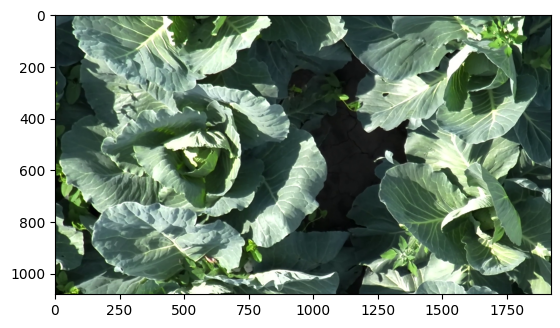

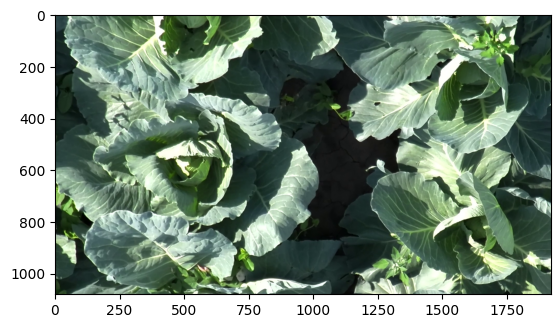

Среднее значение разностей интенсивностей для каждого пикселя двух кадров (по 3 цветовым каналам) = 3727.7568


['.config', 'drive', 'sample_data']

In [ ]:
from google.colab.patches import cv2_imshow

# прочитаем изображение из файла
image1 = mpimg.imread('/content/drive/MyDrive/Непохожие файлы/zoomcam2_frame_2295.png') #, cv2.IMREAD_COLOR')
# размерность
print(image1.shape)

# выведем на экран
plt.imshow(image1)
plt.show()

image2 = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Видео/NEW_zoomcam2/zoomcam2_frame_2266.png') #, cv2.IMREAD_COLOR')
plt.imshow(image2)
plt.show()

print(image2.)

# Вычислить разность интенсивностей для каждого пикселя двух кадров
diff = cv2.absdiff(image1[:][:][0], image2[:][:][0]) + cv2.absdiff(image1[:][:][1], image2[:][:][1]) + cv2.absdiff(image1[:][:][2], image2[:][:][2])

# Вычислить сумму разностей интенсивностей для каждого пикселя двух кадров
mean_diff = diff.mean()
mean_diff = diff.sum()
# Распечатать полученную сумму
# print("Cумма разностей интенсивностей для каждого пикселя двух кадров (сумма по 3 цветовым каналам) =", sum_diff)
print("Среднее значение разностей интенсивностей для каждого пикселя двух кадров (по 3 цветовым каналам) =", mean_diff)

os.listdir()